<a href="https://colab.research.google.com/github/HesterLim/Premier_League_Mathch_Prediction/blob/main/PremierLeagueMatchPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Premier League Match Prediction

The task at hand consists of two tasks:
- Build a classification model to predict the result of a match (Home / Away / Draw) given the match statistics
- Build a regression model to predict the number of goals expected for matches given the match statistics.

Here's the high level approach to perform both tasks at hand:
*   Data Preprocessing
*   Exploratory Data Analysis (EDA)
*   Model Building
*   Model Selection


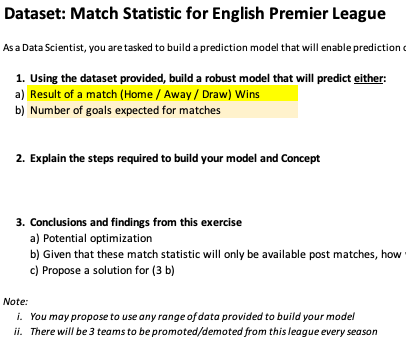

In [ ]:
# Import all libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing
Load the data and perform any necessary data cleaning and preprocessing steps such as handling missing values, converting categorical variables to numerical variables, and scaling numerical variables.

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Accuyield_Test Package_Data Scientist.xlsx', sheet_name = 'Dataset')
data

,Date,Time,Week,Season,HomeTeam,AwayTeam,Result,HomeScore,AwayScore,TotalGoals,...,home_throw_ins,away_throw_ins,home_long_balls,away_long_balls,home_yellow_card,away_yellow_card,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card
0,42958,19:45:00,1,2017-2018,Arsenal,Leicester City,H,4,3,7,...,21,21,67,67,0,1,0,0,0,0
1,42959,12:30:00,1,2017-2018,Watford,Liverpool,D,3,3,6,...,26,26,100,100,0,3,0,0,0,0
2,42959,15:00:00,1,2017-2018,Crystal Palace,Huddersfield Town,A,0,3,3,...,19,19,93,93,1,3,0,0,0,0
3,42959,15:00:00,1,2017-2018,West Bromwich Albion,Bournemouth,H,1,0,1,...,30,30,106,106,3,1,0,0,0,0
4,42959,15:00:00,1,2017-2018,Chelsea,Burnley,A,2,3,5,...,13,13,72,72,4,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,45053,16:30:00,35,2022-2023,Newcastle United,Arsenal,A,0,2,2,...,26,26,54,54,2,1,0,0,0,0
2243,45053,19:00:00,35,2022-2023,West Ham United,Manchester United,H,1,0,1,...,10,10,60,60,0,2,0,0,0,0
2244,45054,15:00:00,35,2022-2023,Fulham,Leicester City,H,5,3,8,...,20,20,64,64,0,3,0,0,0,0
2245,45054,17:30:00,35,2022-2023,Brighton and Hove Albion,Everton,A,1,5,6,...,24,24,54,54,1,5,0,0,0,0


In [ ]:
# Check the dimensions of the dataset. Row and columns present
data.shape

(2247, 62)

In [ ]:
# View the first few rows of the dataset and get an idea of what the data looks like.
data.head()

,Date,Time,Week,Season,HomeTeam,AwayTeam,Result,HomeScore,AwayScore,TotalGoals,...,home_throw_ins,away_throw_ins,home_long_balls,away_long_balls,home_yellow_card,away_yellow_card,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card
0,42958,19:45:00,1,2017-2018,Arsenal,Leicester City,H,4,3,7,...,21,21,67,67,0,1,0,0,0,0
1,42959,12:30:00,1,2017-2018,Watford,Liverpool,D,3,3,6,...,26,26,100,100,0,3,0,0,0,0
2,42959,15:00:00,1,2017-2018,Crystal Palace,Huddersfield Town,A,0,3,3,...,19,19,93,93,1,3,0,0,0,0
3,42959,15:00:00,1,2017-2018,West Bromwich Albion,Bournemouth,H,1,0,1,...,30,30,106,106,3,1,0,0,0,0
4,42959,15:00:00,1,2017-2018,Chelsea,Burnley,A,2,3,5,...,13,13,72,72,4,3,1,0,1,0


In [ ]:
# Get some summary statistics for the numerical variables in the dataset.
data.describe()

,Date,Week,HomeScore,AwayScore,TotalGoals,home_xg,away_xg,home_shots_acc,away_shots_acc,home_passing_acc,...,home_throw_ins,away_throw_ins,home_long_balls,away_long_balls,home_yellow_card,away_yellow_card,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card
count,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,...,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000
mean,44007.007566,19.252781,1.517579,1.244771,2.762350,1.484958,1.229640,0.332277,0.342060,0.767165,...,21.240765,21.240765,70.027147,70.027147,1.590565,1.741433,0.032043,0.033823,0.019582,0.026257
std,626.050157,10.851594,1.331022,1.211289,1.661611,0.832491,0.748791,0.153967,0.169516,0.075135,...,6.245381,6.245381,14.744475,14.744475,1.250702,1.285021,0.183579,0.190408,0.138588,0.159935
min,42958.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.492701,...,5.000000,5.000000,31.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43460.000000,10.000000,1.000000,0.000000,2.000000,0.800000,0.700000,0.227273,0.230769,0.718035,...,17.000000,17.000000,59.000000,59.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,44032.000000,19.000000,1.000000,1.000000,3.000000,1.400000,1.100000,0.333333,0.333333,0.776068,...,21.000000,21.000000,70.000000,70.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,44547.000000,29.000000,2.000000,2.000000,4.000000,2.000000,1.600000,0.428571,0.444444,0.824870,...,25.000000,25.000000,79.500000,79.500000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,45054.000000,38.000000,9.000000,9.000000,9.000000,5.900000,4.900000,1.000000,1.000000,0.922535,...,44.000000,44.000000,121.000000,121.000000,7.000000,7.000000,2.000000,2.000000,1.000000,1.000000


In [ ]:
#  Check if any of the columns have missing data.
data.isnull().sum()

Date                    0
Time                    0
Week                    0
Season                  0
HomeTeam                0
                       ..
away_yellow_card        0
home_red_card           0
away_red_card           0
home_yellow_red_card    0
away_yellow_red_card    0
Length: 62, dtype: int64

In [ ]:
# Explore the distribution of the target variable 'y' to see how many samples belong to each class.
data['Result'].value_counts

<bound method IndexOpsMixin.value_counts of 0       H
1       D
2       A
3       H
4       A
       ..
2242    A
2243    H
2244    H
2245    A
2246    H
Name: Result, Length: 2247, dtype: object>

In [ ]:
data['TotalGoals'].value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       6
2       3
3       1
4       5
       ..
2242    2
2243    1
2244    8
2245    6
2246    7
Name: TotalGoals, Length: 2247, dtype: int64>

In [ ]:
# Overview of the features and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2247 non-null   int64  
 1   Time                    2247 non-null   object 
 2   Week                    2247 non-null   int64  
 3   Season                  2247 non-null   object 
 4   HomeTeam                2247 non-null   object 
 5   AwayTeam                2247 non-null   object 
 6   Result                  2247 non-null   object 
 7   HomeScore               2247 non-null   int64  
 8   AwayScore               2247 non-null   int64  
 9   TotalGoals              2247 non-null   int64  
 10  home_xg                 2247 non-null   float64
 11  away_xg                 2247 non-null   float64
 12  home_shots_acc          2247 non-null   float64
 13  away_shots_acc          2247 non-null   float64
 14  home_passing_acc        2247 non-null   

## Exploratory Data Analysis (EDA)
to perform some exploratory data analysis (EDA) to understand the distribution of the data and identify any patterns or trends.

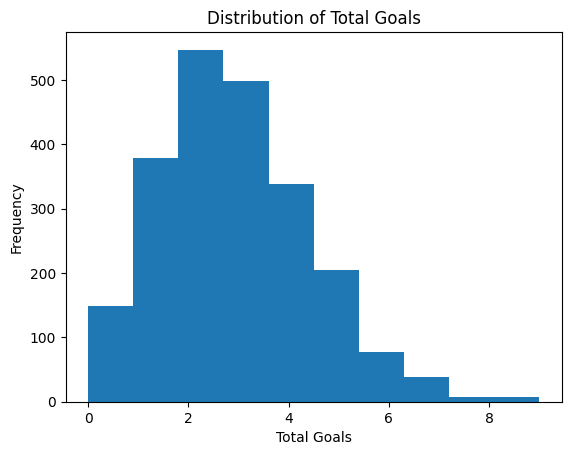

Skewness: 0.5798392383715928
Kurtosis: 0.312009656755726
Median: 3.0


In [ ]:
# Plot a histogram of TotalGoals
plt.hist(data['TotalGoals'], bins=10)
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Total Goals')
plt.show()

# Check the skewness and kurtosis of TotalGoals
print("Skewness:", data['TotalGoals'].skew())
print("Kurtosis:", data['TotalGoals'].kurt())
print("Median:", data['TotalGoals'].median())

Note :
- The distribution of Total Goals seems to follow a Poisson Distribution.
- Hence the median should be used to evaluate. The median total goals scored per match in the Premier League is 3.



- Skewness measures the asymmetry of a probability distribution. It quantifies the extent to which a distribution deviates from a symmetrical or normal distribution.

*   Positive skewness: If the skewness is positive, it indicates that the tail of the distribution is longer on the right side, and the distribution is said to be right-skewed or positively skewed.
*   Negative skewness: If the skewness is negative, it indicates that the tail of the distribution is longer on the left side, and the distribution is said to be left-skewed or negatively skewed.
*   Skewness close to zero: If the skewness is close to zero, it suggests that the distribution is approximately symmetrical.

Skewness values are typically interpreted as follows:
*   Skewness = 0: The distribution is perfectly symmetrical.
*   Skewness < -1 or Skewness > 1: The distribution is highly skewed.
*   -1 < Skewness < -0.5 or 0.5 < Skewness < 1: The distribution is moderately skewed.
*   -0.5 < Skewness < 0.5: The distribution is approximately symmetrical.

Hence, given the Total Goal's skewness is 0.579, it is moderately skewed.


- Kurtosis measures the shape of the probability distribution by describing the tails and the peakedness (or flatness) compared to a normal distribution. Kurtosis can have positive or negative values, or it can be close to zero.

*   Positive kurtosis: If the kurtosis is positive, it indicates that the distribution has heavier tails and a sharper peak (leptokurtic) compared to a normal distribution.
*   Negative kurtosis: If the kurtosis is negative, it indicates that the distribution has lighter tails and a flatter peak (platykurtic) compared to a normal distribution.
*   Kurtosis close to zero: If the kurtosis is close to zero, it suggests that the distribution has similar tails and peak as a normal distribution (mesokurtic).

Kurtosis values are typically interpreted as follows:
*   Kurtosis = 0: The distribution has the same kurtosis as a normal distribution (mesokurtic).
*   Kurtosis < -1 or Kurtosis > 1: The distribution has extreme tails and a sharper peak (leptokurtic or platykurtic).
*   -1 < Kurtosis < 1: The distribution has tails and a peak similar to a normal distribution.


Hence, given the Total Goal's kurtosis is 0.312, its distribution is similar to a normal distribution

All in all, the distribution behaves similar to both normal distribution and Poission distribution. However, due to the fact that Total Goals is a discrete distribution, modelling it with Poission distribution seems to be the right course of action.






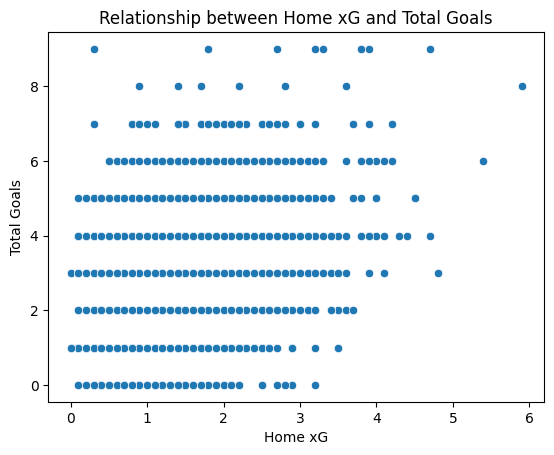

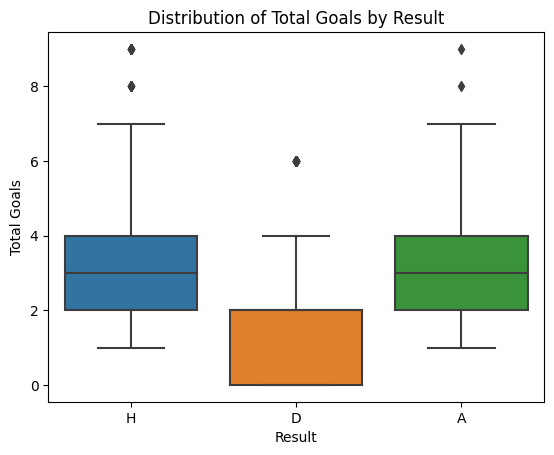

In [ ]:
# Plot scatter plots or box plots to explore relationships between specific variables
sns.scatterplot(x='home_xg', y='TotalGoals', data=data)
plt.xlabel('Home xG')
plt.ylabel('Total Goals')
plt.title('Relationship between Home xG and Total Goals')
plt.show()

sns.boxplot(x='Result', y='TotalGoals', data=data)
plt.xlabel('Result')
plt.ylabel('Total Goals')
plt.title('Distribution of Total Goals by Result')
plt.show()

Note :
- There seems to be no apparent relationship between home XG and Total Goals. Other than the fact, that we can still that goals are mostly clustered between 0 and 3.
- From the dataset, we can observed that the total goals scored regarless of the result is similar between Home and Away.

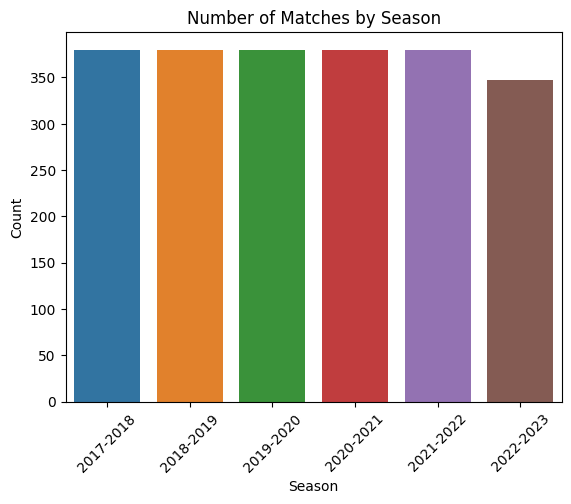

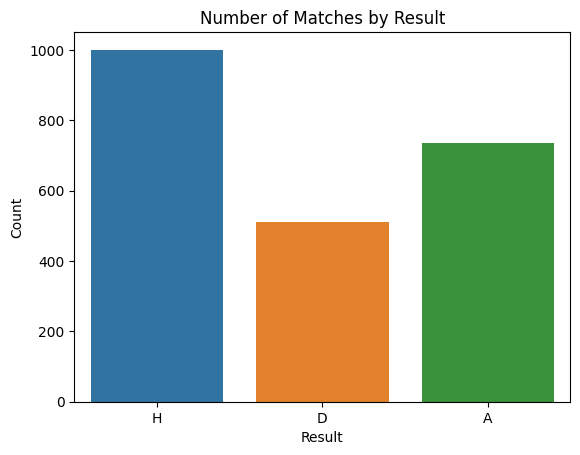

In [ ]:
# Plot bar plots to visualize the distribution of categorical variables
sns.countplot(x='Season', data=data)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Number of Matches by Season')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Result', data=data)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Number of Matches by Result')
plt.show()

Note:
- The number of matches recorded in the dataset per season stayed relatively the same. Hence, there is no inherent bias to a particular season.
- The number of matches won at Home is higher compared to Away suggesting that there might be the "home advantage".

## Model Building
Both XGBoosts and Random Forest Classifier are selected for model building for the following reasons:
- Diverse Algorithms: XGBoost and RandomForest Classifier are based on different algorithms. XGBoost is a gradient boosting algorithm, while RandomForest is an ensemble algorithm based on decision trees. By using both algorithms, you can leverage the strengths and characteristics of each to improve prediction performance.
- Model Comparison: By building models with both XGBoost and RandomForest Classifier, you can compare their performance and evaluate which algorithm works better for your specific task. This comparison can help you gain insights into the strengths and weaknesses of each algorithm and guide your decision-making process
- Ensemble Methods: XGBoost and RandomForest Classifier are both ensemble methods that combine multiple weak learners to create a stronger model. By using ensemble methods, you can reduce the risk of overfitting and improve the generalization ability of the model.
- Robustness: Different algorithms may handle data and features differently. By using both XGBoost and RandomForest Classifier, you can assess the consistency and robustness of the predictions across different models. If both models consistently predict similar outcomes, it provides more confidence in the predictions.
- Model Interpretation: XGBoost and RandomForest Classifier offer different ways to interpret the importance of features in the prediction. By using both models, you can compare the feature importances derived from each algorithm and gain a more comprehensive understanding of the influential factors in the prediction.

XGBoost :

*   Gradient Boosting: XGBoost is based on the gradient boosting technique, where weak models are added sequentially to the ensemble, and each subsequent model is trained to correct the mistakes made by the previous models. This iterative process helps improve the overall predictive performance of the model.
*   Regularization: XGBoost incorporates regularization techniques to prevent overfitting and improve generalization. It includes two types of regularization: L1 regularization (Lasso regularization) and L2 regularization (Ridge regularization). These techniques help control the complexity of the model and reduce the impact of noisy or irrelevant features.
*   Tree-Based Models: XGBoost primarily uses decision trees as base models. Decision trees are created iteratively, with each tree trained to minimize a specific loss function. The algorithm intelligently selects the best split points and handles missing values and categorical features effectively.
*   Gradient Optimization: XGBoost optimizes the objective function (loss function) by computing the gradient and the second derivative of the loss function. This allows for more precise adjustments of the model during the training process and faster convergence.
*   Parallel Processing: XGBoost has built-in support for parallel processing, allowing it to take advantage of multi-core CPUs. This parallelization speeds up the training process and makes XGBoost highly scalable and efficient for large dataset
*   Feature Importance: XGBoost provides a measure of feature importance, which indicates the relative importance of each feature in the prediction. This information can be useful for feature selection, feature engineering, and understanding the underlying patterns in the data.


Random Forest :
*   Ensemble of Decision Trees: Random Forest builds an ensemble of decision trees, where each tree is trained independently on a random subset of the data and features. This randomness introduces diversity in the individual trees and helps reduce overfitting.
*   Random Subsampling: Random Forest performs bootstrapping, which involves sampling the training data with replacement to create multiple subsets. Each subset is used to train a decision tree, and these trees are combined to make predictions.
*   Feature Randomness: In addition to sampling the data, Random Forest also introduces randomness in the feature selection process. At each split in a decision tree, a random subset of features is considered to find the best split. This randomness helps to decorrelate the trees and improve the model's robustness.
*   Voting Mechanism: When making predictions, Random Forest combines the predictions of all the individual trees. For classification tasks, it uses majority voting, where the class that receives the most votes from the trees is chosen as the final prediction. For regression tasks, it takes the average of the predicted values.
*   Feature Importance: Random Forest provides a measure of feature importance based on how much each feature contributes to reducing the impurity or increasing the information gain in the decision trees. This information can help identify the most influential features in the prediction.
*  Handling Missing Values: Random Forest can handle missing values in the dataset by using surrogate splits. Surrogate splits are alternative splits used when the value of a feature is missing for a particular data point. This allows the algorithm to still make use of the available information.
*   Robustness to Outliers and Noise: Random Forest is less sensitive to outliers and noisy data compared to individual decision trees. The averaging of multiple trees helps to smooth out the effects of outliers and reduce overfitting.











## Predit the result of a match (Win, Away and Draw) given the match statistic

In [ ]:
# Select relevant features and target variable
features = data.drop(["Result"], axis=1)
target = data["Result"]

# Perform one-hot encoding for categorical variables
features_encoded = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score globally by considering total true positives,
# false negatives, and false positives across all classes
f1 = f1_score(y_test, y_pred, average = 'micro')
print("F1 Score:", f1)

Accuracy: 0.9688888888888889
F1 Score: 0.9688888888888889


Note:
- Applying Random Tree Classifier, we are able to achieve an F1-score of 96%
accuracy to predict the result of a match (Win, Away and Draw)

XGBoost

In [ ]:
# Create an instance of XGBClassifier
model = XGBClassifier()

# Encode the binary variable using label encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate F1 score globally by considering total true positives,
# false negatives, and false positives across all classes
f1 = f1_score(y_test, y_pred, average = 'micro')
print("F1 Score:", f1)

Accuracy: 0.9977777777777778
F1 Score: 0.9977777777777778


Note:

Applying XGBoost model, we are able to achieve an F1-score of 99.78% accuracy to predict the result of a match (Win, Away and Draw)

## Predit the Total Goals Scored given the match statistic

In [ ]:
# Select relevant features and target variable
features = data.drop(["TotalGoals"], axis=1)
target = data["TotalGoals"]

# Perform one-hot encoding for categorical variables
features_encoded = pd.get_dummies(features)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Create an instance of RandomForestRegressor
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.057472698832672815


In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0032502222222222203


Note:

Applying XGBoost Regressor model, we are able to achieve an Mean Squared Error  of 0.003 which is sufficiently small to predict the number of goals per match
given the match statistics.

Summary :
*   XGBoost performs better than Random Forest in predicting the result of the match given the match statistics (99.7%)
*   XGBoost also perform better than Random Forest in predicting the total number of goals scored in a matched given the match statistcs (RMSE : 0.003)



(a) Potential Optimizations to consider :-

*   Hyperparameter tuning: Optimize the hyperparameters of the XGBoost model to potentially improve its performance. Use techniques like grid search or randomized search to explore different combinations of hyperparameters and find the ones that yield the best results. This can include parameters like learning rate, maximum depth, number of estimators, regularization parameters, etc
*   Regularization: Implement regularization techniques such as L1 or L2 regularization to prevent overfitting and improve generalization. Regularization helps control the complexity of the model and reduces the chances of it memorizing the training data instead of learning meaningful patterns.
*   Cross-validation: Perform cross-validation to obtain a more reliable estimate of your model's performance. This involves splitting the data into multiple folds and training/evaluating the model on different combinations of the folds. It helps assess the model's generalization performance and provides a more robust estimate of its effectiveness.
*   Ensemble methods: Explore the possibility of using ensemble methods, such as combining multiple XGBoost models or incorporating other machine learning algorithms, to further improve performance. Ensemble methods can help reduce bias, variance, and improve overall predictive accuracy.


(b) & (c) Given that these match statistic will only be available post matches, how would you perfrom predictions for future matches with limited data:
- After reading some latest researchs on the topic, we can use the team's expected goals (xG) and its expected goals conceded (xGC) to to make predictions for future matches.

This approach relies on historical performance and the underlying quality of the teams involved.

Here's a general outline of the proposed approach:
1.   Calculate team-level statistics: Calculate the average expected goals (xG) and expected goals conceded for each team based on their historical performance. This can be done by aggregating the relevant statistics from previous matches.
2.   Consider recent form: Place more emphasis on recent matches to capture the teams' current form. This can be done by weighing the historical performance by giving more importance to recent matches or applying a decay factor to older matches.
3.   Adjust for home advantage: Take into account the home and away performances of the teams. Teams often perform differently when playing at home compared to playing away. Consider incorporating home advantage factors into the predictions.
4.   Evaluate head-to-head matchups: Analyze the head-to-head matchups between the teams involved in the upcoming match. Look at their historical performances against each other and consider any patterns or trends that may influence the outcome.
5.   Use predictive models: Build predictive models based on the historical data, incorporating the calculated team-level statistics, recent form, home advantage, and head-to-head matchups. Various machine learning techniques like regression, time series analysis, or even simpler models like weighted averages can be used to make predictions.
6.   Update predictions over time: As new match results become available, update the team-level statistics and recent form to continually refine and improve your predictive models. This iterative process ensures that the predictions are based on the most up-to-date information.
